In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize

In [2]:
df_model_results = pd.read_csv("Data/TF_1_NN_CF_Fatma_Violence_BOW_results_30_05_2018.csv")

In [25]:
len(df_model_results)

300

In [16]:
df_model_results.columns

Index(['Unnamed: 0', 'predction', 'prob_non_violent', 'prob_violent',
       'test_text', 'y'],
      dtype='object')

In [15]:
print('right_pos', len(df_model_results[df_model_results['y']==1]))
print('right_neg', len(df_model_results[df_model_results['y']==0]))

right_pos 67
right_neg 233


In [9]:
df_right_classification = df_model_results[df_model_results['predction'] == df_model_results['y']]

In [10]:
df_mis_classification = df_model_results[df_model_results['predction'] != df_model_results['y']]

In [11]:
print('no. right classififcation ', len(df_right_classification))
print('no. mis classififcation ', len(df_mis_classification))

no. right classififcation  224
no. mis classififcation  76


In [14]:
confusion_matrix(df_model_results['y'],df_model_results['predction'])

array([[190,  43],
       [ 33,  34]])

In [21]:
df_vio_df_right_classification = df_right_classification[df_right_classification['y']==1]
df_non_vio_df_right_classification = df_right_classification[df_right_classification['y']==0]

In [28]:
df_vio_df_mis_classification = df_mis_classification[df_mis_classification['y']==1]
df_non_vio_df_mis_classification = df_mis_classification[df_mis_classification['y']==0]

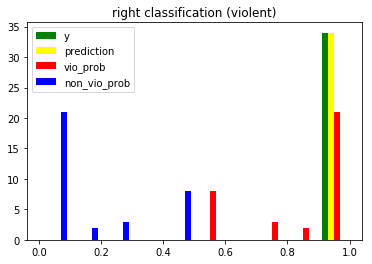

In [27]:
labels = ['y', 'prediction', 'vio_prob', 'non_vio_prob']
colors = ['green', 'yellow', 'red', 'blue']
plt.hist([df_vio_df_right_classification['y'],df_vio_df_right_classification['predction'],df_vio_df_right_classification['prob_violent'],df_vio_df_right_classification['prob_non_violent']],
        label=labels,color=colors, stacked=False)
plt.legend()
plt.title('right classification (violent)')
plt.show()

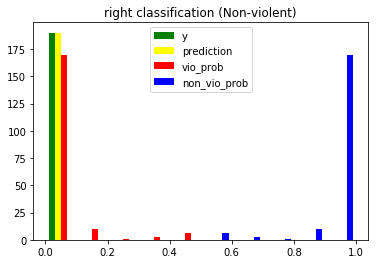

In [26]:
labels = ['y', 'prediction', 'vio_prob', 'non_vio_prob']
colors = ['green', 'yellow', 'red', 'blue']
plt.hist([df_non_vio_df_right_classification['y'],df_non_vio_df_right_classification['predction'],df_non_vio_df_right_classification['prob_violent'],df_non_vio_df_right_classification['prob_non_violent']],
        label=labels,color=colors, stacked=False)
plt.legend()
plt.title('right classification (Non-violent)')
plt.show()

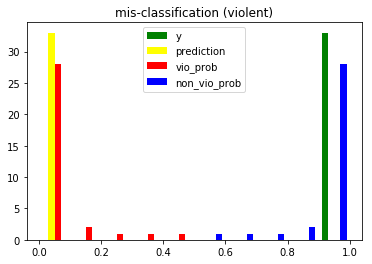

In [30]:
labels = ['y', 'prediction', 'vio_prob', 'non_vio_prob']
colors = ['green', 'yellow', 'red', 'blue']
plt.hist([df_vio_df_mis_classification['y'],df_vio_df_mis_classification['predction'],df_vio_df_mis_classification['prob_violent'],df_vio_df_mis_classification['prob_non_violent']],
        label=labels,color=colors, stacked=False)
plt.legend()
plt.title('mis-classification (violent)')
plt.show()

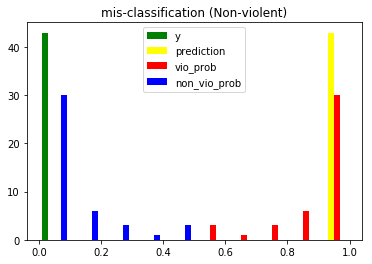

In [31]:
labels = ['y', 'prediction', 'vio_prob', 'non_vio_prob']
colors = ['green', 'yellow', 'red', 'blue']
plt.hist([df_non_vio_df_mis_classification['y'],df_non_vio_df_mis_classification['predction'],df_non_vio_df_mis_classification['prob_violent'],df_non_vio_df_mis_classification['prob_non_violent']],
        label=labels,color=colors, stacked=False)
plt.legend()
plt.title('mis-classification (Non-violent)')
plt.show()

In [32]:
def word_frequencies(word_list):
    freq={}

    for word in word_list:
        count=freq.get(word,0)
        freq[word]=count + 1

    frequency_list  = freq.keys()    

    results = []
    for word in frequency_list:
        tuple = (word, freq[word])
        results.append(tuple)

    byFreq=sorted(results, key=lambda word: word[1], reverse=True)


    words_names=[]
    words_count=[]
    for (word, freq) in byFreq[:10]:
        print (word, freq)
        words_names.append(word)
        words_count.append(freq)
    return words_names, words_count  

In [35]:
mis_classififed_pos_words_list = df_vio_df_mis_classification['test_text'].apply(lambda x:word_tokenize(x) )
mis_classififed_neg_words_list = df_non_vio_df_mis_classification['test_text'].apply(lambda x:word_tokenize(x) )

In [36]:
right_classififed_pos_words_list = df_vio_df_right_classification['test_text'].apply(lambda x:word_tokenize(x) )
right_classififed_neg_words_list = df_non_vio_df_right_classification['test_text'].apply(lambda x:word_tokenize(x) )

In [37]:
right_pos_words_list = [item for items in right_classififed_pos_words_list for item in items] #flatten the list of lists into one list
right_neg_words_list = [item for items in right_classififed_neg_words_list for item in items]

In [38]:
mis_pos_words_list = [item for items in mis_classififed_pos_words_list for item in items] #flatten the list of lists into one list
mis_neg_words_list = [item for items in mis_classififed_neg_words_list for item in items]

police 6
gas 6
news 5
bbc 5
people 4
water 4
tear 4
attack 4
please 4
via 3


Text(0.5,1,'word freq for misclassified pos tweets')

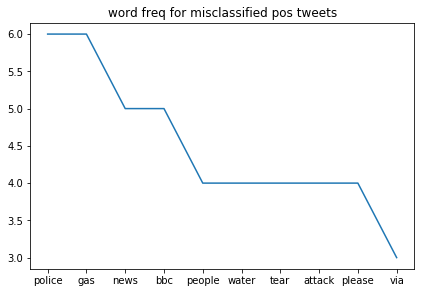

In [39]:
word, freq = word_frequencies(mis_pos_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for misclassified pos tweets')

police 15
people 10
mon 8
square 6
power 4
stand 4
love 4
across 3
riot 3
never 3


Text(0.5,1,'word freq for misclassified neg tweets')

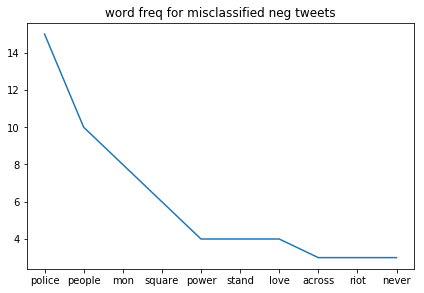

In [40]:
word, freq = word_frequencies(mis_neg_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for misclassified neg tweets')


police 38
gas 10
tear 9
square 8
ankara 7
riot 7
people 6
new 3
news 3
fired 3


Text(0.5,1,'word freq for right classified pos tweets')

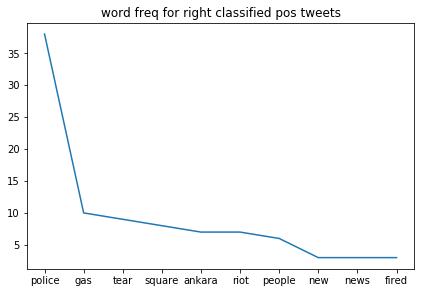

In [41]:
word, freq = word_frequencies(right_pos_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for right classified pos tweets')

people 17
world 16
please 13
via 13
media 10
get 9
day 9
one 8
says 8
us 7


Text(0.5,1,'word freq for right classified neg tweets')

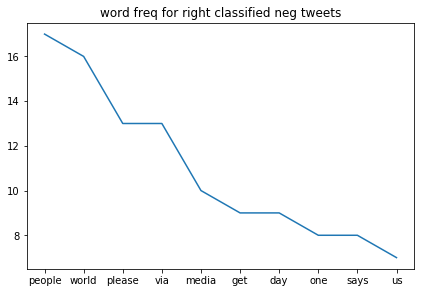

In [42]:
word, freq = word_frequencies(right_neg_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for right classified neg tweets')